# Formula 1 - 2020 Season Analysis

### Created by Doğan Yiğit Yenigün (toUpperCase78)

### Welcome to the Data Analysis of Formula 1 2020 Season!

The Formula 1 history and the fans worldwide lived another season with full of **excitements**, **competitions**, **challenges**, **happiness** and **sadness**. However, 2020 season is somewhat different due to the effects of **Covid-19** virus which spread out to the world, causing tens of millions of people getting infected and more than two million deaths. Together with the foreseeable effects of the virus, F1 also got affected badly such that the start of the season has been postponed to several months later. In all race weekends, for health and safety of all people, lots of strict precautions have been applied in order to keep the virus away.

Despite the pandemic, it couldn't prevent us from watching these races, even no spectators in grandstands; every weekend the **thrill**, the **passion**, the **enthusiasm** remains the same as previously.

Besides, this season left important data behind. We are here to gain valuable insights about what this season has brought. That's why, we are going to analyze the drivers, the teams, and the races with broad details as much as possible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline

In [2]:
calendar = pd.read_csv('formula1_2020season_calendar.csv')
calendar.set_index('Round', inplace=True)
drivers = pd.read_csv('formula1_2020season_drivers.csv')
drivers.set_index('Abbreviation', inplace=True)
raceResults = pd.read_csv('formula1_2020season_raceResults.csv')

**The necessary modules have been imported, the datasets have been properly prepared. And, if you're ready, LET'S SEND IT!**

### 2020 Season Race Calendar

Like stated above, this season became unusual because of **Covid-19** pandemic that affected the world rapidly. For people's health and safety, it was decided to not start the season in March. For this reason, **Australia GP** was cancelled first with a few hours remaining to start the first practice session. Later, several other countries clarified to not host any F1 race this year, including **these two race tracks**: **Vietnam GP** (Hanoi Street Circuit) which was brand-new and **Netherlands GP** (Zandvoort) which was ready to come back after more than 30 years.

On the other hand, the F1 authoritatives have determined to start the season in **July** as the most appropriate time and it was planned to end in **December**. Initially, **8** tracks have been confirmed to host races which they were all from European countries. As the days passed, more tracks have been added to the calendar, including the ones that **no F1 races were carried out** before while some had **prior experiences** about F1 and ready to host another one.

These newest tracks are **Mugello** (Tuscany GP), and **Algarve** (Portugal GP). The ones with experience are **Nurburgring** (Eifel GP), **Imola** (Emilia Romagna GP), and **Istanbul Park** (Turkey GP) _(Yes! You read that right!)._

What makes it interesting for this season is that some Grands Prix have been organized on the same track **twice**. These are **Red Bull Ring** (Austria & Styria GP), **Silverstone** (Great Britain & 70th Anniversary GP) and **Bahrain International** (Bahrain & Sakhir GP; both the regular and outer track layout).

All things considered, 2020 Season is comprised of **17** Grands Prix with their city, race dates, circuit names, lengths and number of laps given below:

In [3]:
calendar[['GP Name', 'Country', 'City', 'Circuit Name', 'Race Date', 'Circuit Length(km)', 'Number of Laps']]

,GP Name,Country,City,Circuit Name,Race Date,Circuit Length(km),Number of Laps
Round,,,,,,,
1,Austria,Austria,Spielberg,Red Bull Ring,5 Jul 2020,4.318,71
2,Styria,Austria,Spielberg,Red Bull Ring,12 Jul 2020,4.318,71
3,Hungary,Hungary,Budapest,Hungaroring,19 Jul 2020,4.381,70
4,Great Britain,Great Britain,Silverstone,Silverstone Circuit,2 Aug 2020,5.891,52
5,70th Anniversary,Great Britain,Silverstone,Sliverstone Circuit,9 Aug 2020,5.891,52
6,Spain,Spain,Catalunya,Circuit de Barcelona-Catalunya,16 Aug 2020,4.655,66
7,Belgium,Belgium,Spa-Francorchamps,Circuit de Spa-Francorchamps,30 Aug 2020,7.004,44
8,Italy,Italy,Monza,Autodromo Nazionale Monza,6 Sep 2020,5.793,53
9,Tuscany,Italy,Tuscany,Mugello,13 Sep 2020,5.245,59


### 2020 Season Drivers

We have seen a total of **23** different drivers participated in all races of this season; where **3** of them are **reserve** drivers. There are a few changes to the roster of main drivers among all 10 teams, when compared to 2019:

* In Renault, **Esteban Ocon** replaced **Nico Hulkenberg**.
* In Williams, **Nicholas Latifi** replaced **Robert Kubica**.
* Then, **Kubica** became the reserve driver for **Alfa Romeo**.

Speaking of teams, the only change came from **Toro Rosso** which was re-branded as **AlphaTauri** with _white_ and _navy blue_ livery, and still using **Honda** power unit. Plus, **Mercedes AMG Petronas** adopted to _black_ livery  in 2020, instead of the well-known _silver_ one.

Throughout the season, **Nico Hulkenberg**, who lastly raced for Renault in 2019, has been called by **Racing Point** a total of **three times** in order to replace the drivers who caught **Covid-19** in the corresponding Grand Prix weekends. He shouldn't feel so foreign as he knew them formerly during **Force India** years. Well, we shall see in the analyses below for how well the German performed in the races participated.

In addition, **Jack Aitken** and **Pietro Fittipaldi** got their chances for their debuts in Formula 1 especially when two race weekends left.

In [42]:
drivers[['Number', 'Driver', 'Team', 'Country', 'Date of Birth', 'Place of Birth', 
         'Grands Prix Entered', 'Highest Race Finish']]

,Number,Driver,Team,Country,Date of Birth,Place of Birth,Grands Prix Entered,Highest Race Finish
Abbreviation,,,,,,,,
HAM,44,Lewis Hamilton,Mercedes,United Kingdom,07/01/1985,"Stevenage, England",266,1(x95)
BOT,77,Valtteri Bottas,Mercedes,Finland,28/08/1989,"Nastola, Finland",157,1(x9)
VER,33,Max Verstappen,Red Bull Racing,Netherlands,30/09/1997,"Hasselt, Belgium",119,1(x10)
PER,11,Sergio Perez,Racing Point,Mexico,26/01/1990,"Guadalajara, Mexico",193,1(x1)
RIC,3,Daniel Ricciardo,Renault,Australia,01/07/1989,"Perth, Australia",188,1(x7)
SAI,55,Carlos Sainz,McLaren,Spain,01/09/1994,"Madrid, Spain",119,2(x1)
ALB,23,Alexander Albon,Red Bull Racing,Thailand,23/03/1996,"London, England",38,3(x2)
LEC,16,Charles Leclerc,Ferrari,Monaco,16/10/1997,"Monte Carlo, Monaco",59,1(x2)
NOR,4,Lando Norris,McLaren,United Kingdom,13/11/1999,"Bristol, England",38,3(x1)


By the way, I've implemented **this below function** which will be helpful to determine the correct colors of the teams and of the drivers they've raced with, when it comes to display the corresponding data visualizations...

In [5]:
def assign_color(val_type,values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','RAI','GIO']:         cl.append('#960000')
        elif abbr in ['HAAS','GRO','MAG','FIT']: cl.append('#787878')
        elif abbr in ['RACI','PER','STR','HUL']: cl.append('#f595c8')
        elif abbr in ['WILL','RUS','LAT','AIT']: cl.append('#0082fa')
        elif abbr in ['ALPH','GAS','KVY']:       cl.append('#ffffff')
        elif abbr in ['MCLA','SAI','NOR']:       cl.append('#ff8700')
        elif abbr in ['RED ','VER','ALB']:       cl.append('#0600f0')
        elif abbr in ['FERR','LEC','VET']:       cl.append('#cb0000')
        elif abbr in ['MERC','HAM','BOT']:       cl.append('#00d2b5')
        elif abbr in ['RENA','RIC','OCO']:       cl.append('#fff500')
    return cl

### Results of Several Notable Races in 2020 Season

Despite the **Covid-19 outbreak** and **shortened calendar**, we the fans have witnessed **several exciting races** and challenges this season. They are worthwhile to talk about in general, point out the key moments and show which drivers were classified in the top 10:

**AUSTRIA** - Season-opening races always created curiosity such that how the drivers' and cars' performances would be affected with the new regulations applied in advance. Plus, an important indication if any team has **improved themselves or gone backwards** when compared with the previous season, in terms of lap times and positions of the drivers. In the first week of July, we got most of the answers there in **Red Bull Ring Circuit (Spielberg)**.

As seen in the results below, **Bottas** became victorious in the first race of the season, while **Leclerc** came second, and **Norris** came third.

Here, the reigning champion **Hamilton** started the season by finishing **4th**, because a severe contact with **Red Bull's Albon** with a couple of laps remaining caused him to get a **5-second time penalty**, hence stayed out of the podium! As a consequence, **Norris** deserved to get his **first podium** in his F1 career and you should've seen his happiness after the race!

Also, if I'm not mistaken, there are **lots of drivers retired** from the race. The upcoming analyses will reveal the truth to confirm if this statement is correct.

In [6]:
raceResults[raceResults['Track'] == 'Austria'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap
Position,,,,,,,,
1,77,Valtteri Bottas,Mercedes,1,71,1:30:55.739,25,No
2,16,Charles Leclerc,Ferrari,7,71,+2.700,18,No
3,4,Lando Norris,McLaren Renault,3,71,+5.491,16,Yes
4,44,Lewis Hamilton,Mercedes,5,71,+5.689,12,No
5,55,Carlos Sainz,McLaren Renault,8,71,+8.903,10,No
6,11,Sergio Perez,Racing Point BWT Mercedes,6,71,+15.092,8,No
7,10,Pierre Gasly,AlphaTauri Honda,12,71,+16.682,6,No
8,31,Esteban Ocon,Renault,14,71,+17.456,4,No
9,99,Antonio Giovinazzi,Alfa Romeo Racing Ferrari,18,71,+21.146,2,No


**70TH ANNIVERSARY** - The fifth race of the season; this Grand Prix was held in Silverstone Circuit (2nd time this season) and the name was intentionally chosen to commemorate **the 70th year of Formula 1!** Of course, Silverstone, in this way, is an important race track for where it all started, going back to 1950!

Consequently, **Max Verstappen** won this special race ahead of both **Mercedes** drivers, especially **Hamilton** beaten in his home race!

_About the former race in Silverstone (named regularly Great Britain GP), it's Hamilton who **luckily** saw the chequered flag in the 1st place! I said 'lucky' because he greatly managed to drive the car with a blown tyre that occurred in the last lap! Thanks to the significant gap against Verstappen, he did not let the Dutchman overtake him before crossing the finish line!_

Plus, it's worth talking about **Nico Hulkenberg**. Although he left **Renault** in 2019, he was summoned by his former team, **Racing Point** to replace **Sergio Perez** who was tested **positive** for Covid-19! As seen in the results of this race, he started the race in **3rd** place and finished **7th**, taking 6 points for himself and the team! A solid performance, isn't it?

In [7]:
raceResults[raceResults['Track'] == '70th Anniversary'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap
Position,,,,,,,,
1,33,Max Verstappen,Red Bull Racing Honda,4,52,1:19:41.993,25,No
2,44,Lewis Hamilton,Mercedes,2,52,+11.326,19,Yes
3,77,Valtteri Bottas,Mercedes,1,52,+19.231,15,No
4,16,Charles Leclerc,Ferrari,8,52,+29.289,12,No
5,23,Alexander Albon,Red Bull Racing Honda,9,52,+39.146,10,No
6,18,Lance Stroll,Racing Point BWT Mercedes,6,52,+42.538,8,No
7,27,Nico Hulkenberg,Racing Point BWT Mercedes,3,52,+55.951,6,No
8,31,Esteban Ocon,Renault,14,52,+64.773,4,No
9,4,Lando Norris,McLaren Renault,10,52,+65.544,2,No


**ITALY** - The Monza circuit, sometimes nicknamed 'the Cathedral of Speed', is where F1 cars have the opportunity to attain the highest top speed and the highest average speed in a lap among all tracks for many seasons.

In this race, the hero was **Pierre Gasly** who unbelievably won the race and made the **AlphaTauri** crew overjoyed with this glorious triumph! **Carlos Sainz** from McLaren chased after the Frenchman but his effort was not enough to pass him, finishing **2nd** in the end. Then, **Lance Stroll** who moved to the last step of the podium.

Despite no spectators in the grandstands due to the pandemic, this race would be remembered with a **very uncommon** podium; that is, such a podium with **no Mercedes, Ferrari, or Red Bull** drivers got involved!

In contrast, it was the race that **Ferrari** didn't want to remember becuase of **double DNF!** Here, **Vettel** suffered break failures, completing no more than 10 laps, and **Leclerc** had a nasty accident at Parabolica corner on lap 24, which caused the race stopped for a long while!

Speaking of **Hamilton**, he contended himself to finish **7th**! He received **10-second Stop & Go penalty**, just before Leclerc's accident, for entering the pit lane at the time it was closed due to a retired car (Magnussen) parked near the lane. After the restart, he did all his best to climb higher positions in order to mitigate the damage for the Drivers Standings.

In [8]:
raceResults[raceResults['Track'] == 'Italy'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap
Position,,,,,,,,
1,10,Pierre Gasly,AlphaTauri Honda,10,53,1:47:06.056,25,No
2,55,Carlos Sainz,McLaren Renault,3,53,+0.415,18,No
3,18,Lance Stroll,Racing Point BWT Mercedes,8,53,+3.358,15,No
4,4,Lando Norris,McLaren Renault,6,53,+6.000,12,No
5,77,Valtteri Bottas,Mercedes,2,53,+7.108,10,No
6,3,Daniel Ricciardo,Renault,7,53,+8.391,8,No
7,44,Lewis Hamilton,Mercedes,1,53,+17.245,7,Yes
8,31,Esteban Ocon,Renault,12,53,+18.691,4,No
9,26,Daniil Kvyat,AlphaTauri Honda,11,53,+22.208,2,No


**EIFEL** - This Grand Prix was held in Germany, in Nürburgring Circuit; another well-kown track in the country, other than Hockenkeimring.

It's not surprising that **Hamilton** won the race and **Verstappen** took the 2nd place.

However, this race drew the attention with **two substantial events**: First, **Daniel Ricciardo** brought the **Renault** team to the podium after several years, by finishing **3rd**! You might have heard him saying _"Is this a f***ing podium, boys?"_ from the radio, and even the team workers and Cyril Abiteboul could not believe it initially, but this really came true. Yeah, this felt good overall!

Second, it's **Nico Hulkenberg**, who was summoned by Racing Point once again, to replace **Lance Stroll** whose Covid-19 test became **positive**. Although he came unprepared and started the race at the back of the grid (P20), he managed it very well to finish **P8**, another 4 points for himself and the team, as well as he was selected to be **the Driver of the Day!**

In [9]:
raceResults[raceResults['Track'] == 'Eifel'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap
Position,,,,,,,,
1,44,Lewis Hamilton,Mercedes,2,60,1:35:49.641,25,No
2,33,Max Verstappen,Red Bull Racing Honda,3,60,+4.470,19,Yes
3,3,Daniel Ricciardo,Renault,6,60,+14.631,15,No
4,11,Sergio Perez,Racing Point BWT Mercedes,9,60,+16.070,12,No
5,55,Carlos Sainz,McLaren Renault,10,60,+21.905,10,No
6,10,Pierre Gasly,AlphaTauri Honda,12,60,+22.766,8,No
7,16,Charles Leclerc,Ferrari,4,60,+30.841,6,No
8,27,Nico Hulkenberg,Racing Point BWT Mercedes,20,60,+32.596,4,No
9,8,Romain Grosjean,Haas Ferrari,16,60,+39.081,2,No


**TURKEY** - That was the weekend especially the Turkish fans were waiting for! After **nine years of absence**, Istanbul Park Circuit, the track with the famous **Turn 8**, has got the opportuinty to host another F1 race in November 2020!

All the weekend, the weather was often rainy and sometimes overcast. In addition, brand-new asphalt was floored before the race. For these reasons, the race in Istanbul became **significantly difficult**, due to low grip! Since the practice sessions, all the drivers struggled hard to stay on the track. Some drivers liked the challenge, some didn't. But, the fans **expected the unexpected** for what surprises would be encountered there!

In qualifying session, **Lance Stroll** shocked everyone to take the **pole position**, other than both **Mercedes** drivers in the season so far! Yep, he enjoyed the moment very much as it was the **first** one of his career!

In the race, however, **Lewis Hamilton** (started 6th) showed his masterful driving skills to get himself to the victory in Turkey, having **more than 30 seconds** gap and going **almost 50 laps** with intermediate tyres till the end! And, this was where he announced his **7th world championship title** after the race, what a grateful moment!

**Sergio Perez** performed similarly as **Hamilton**, finishing **2nd** with 50-lap old intermediate tyres. Plus, this was **Ferrari**'s best result of this season; **Vettel** and **Leclerc** completed the race in **3rd** and **4th**, respectively. Too bad, Leclerc **missed the podium** in the last lap with a couple of corners remaining as he locked up the front tyres and could not avoid being overtaken by Perez and Vettel.

Last but not the least, the fans all around the world have chosen the **Turkish GP** as the **best race of the season**, with 33% vote rate!

_Besides, let's not forget the special promotion of Istanbul, through the historical places travelled by Albon in Red Bull and Gasly in AlphaTauri!_

In [10]:
raceResults[raceResults['Track'] == 'Turkey'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap
Position,,,,,,,,
1,44,Lewis Hamilton,Mercedes,6,58,1:42:19.313,25,No
2,11,Sergio Perez,Racing Point BWT Mercedes,3,58,+31.633,18,No
3,5,Sebastian Vettel,Ferrari,11,58,+31.960,15,No
4,16,Charles Leclerc,Ferrari,12,58,+33.858,12,No
5,55,Carlos Sainz,McLaren Renault,15,58,+34.363,10,No
6,33,Max Verstappen,Red Bull Racing Honda,2,58,+44.873,8,No
7,23,Alexander Albon,Red Bull Racing Honda,4,58,+46.484,6,No
8,4,Lando Norris,McLaren Renault,14,58,+61.259,5,Yes
9,18,Lance Stroll,Racing Point BWT Mercedes,1,58,+72.353,2,No


**SAKHIR** - The second race in Bahrain, but this was quite unique because **the outer track layout** was used which looked like a ring with long straights, making the circuit length shorter and raising expectations for going **under 1 minute** each lap.

In that week, this time **Lewis Hamilton** was tested **positive** for Covid-19! As he, unfortunately, would be missing the race, **Mercedes** team have agreed with **George Russell** from Williams to get into the seat, his one-time opportunity to show everyone his performance in a championship-winning car.

Certainly, he did that by finishing **2nd** in qualifying just behind his teammate **Bottas**. However, things did not go very well during the race: Although he started so fast, even overtook Bottas in some moments, one of his pit-stop was a disaster due to **tyres mixed up** with Bottas'. Later, he was called to the pit once again because of **tyre puncture**, which eliminated the chance to win the race! He was right to say that **he was absolutely gutted** not once, but twice! Nevertheless, he's made up for it by staying in the top 10 and setting the fastest lap.

On the other hand, the hero of the race was **Sergio Perez**! The Mexican claimed his first victory in his career after about 190 Grand Prix starts, and his teammate **Stroll** came with **3rd** place. A strong progression for **Racing Point** through the Constructors Standings! Plus, the race was **Ocon**'s best result he had, stepping on the **2nd** place of the podium.

_On the further side, **Romain Grosjean**'s horrible accident was unforgettable on the first lap of the former Bahrain race, as we've witnessed a large burst of flames all of a sudden. Thankfully, he got out of the car with his consciousness open and immediately taken to the hospital for medical treatment which lasted several weeks, now in good condition as before. This showed how the advanced safety technologies (including halo) on an F1 car provided to save the driver's life against high-speed impacts, in addition to fireproof racing suits and helmets._

In [11]:
raceResults[raceResults['Track'] == 'Sakhir'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap
Position,,,,,,,,
1,11,Sergio Perez,Racing Point BWT Mercedes,5,87,1:31:15.114,25,No
2,31,Esteban Ocon,Renault,11,87,+10.518,18,No
3,18,Lance Stroll,Racing Point BWT Mercedes,10,87,+11.869,15,No
4,55,Carlos Sainz,McLaren Renault,8,87,+12.580,12,No
5,3,Daniel Ricciardo,Renault,7,87,+13.330,10,No
6,23,Alexander Albon,Red Bull Racing Honda,12,87,+13.842,8,No
7,26,Daniil Kvyat,AlphaTauri Honda,6,87,+14.534,6,No
8,77,Valtteri Bottas,Mercedes,1,87,+15.389,4,No
9,63,George Russell,Mercedes,2,87,+18.556,3,Yes


As stated before, the outer track of Bahrain circuit formed the probability that a lap could be completed **within 1 minute**. So, could **Russell**, who set the fastest lap of the race, really go under this specified time?

_The answer is Yes, his fastest lap time was 55.4 seconds!_

In [12]:
calendar[calendar['GP Name'] == 'Sakhir'].loc[:,['GP Name','Race Date','Lap Record','Record Owner']]

,GP Name,Race Date,Lap Record,Record Owner
Round,,,,
16,Sakhir,6 Dec 2020,0:55.404,George Russell


### 2020 Season - Drivers Standings

All right, after the discusssions of several races we've had this season, we'd like to see how **the Drivers Standings** have been concluded:

In [13]:
driversSt = raceResults.groupby(['Driver','Team'])['Points'].sum().sort_values(ascending=False)
driversSt = driversSt.reset_index().drop(23)
driversSt.iloc[17,1] = 'Williams Mercedes'
driversSt['Position'] = range(1,len(driversSt)+1)
driversSt.set_index('Position')

,Driver,Team,Points
Position,,,
1,Lewis Hamilton,Mercedes,347
2,Valtteri Bottas,Mercedes,223
3,Max Verstappen,Red Bull Racing Honda,214
4,Sergio Perez,Racing Point BWT Mercedes,125
5,Daniel Ricciardo,Renault,119
6,Carlos Sainz,McLaren Renault,105
7,Alexander Albon,Red Bull Racing Honda,105
8,Charles Leclerc,Ferrari,98
9,Lando Norris,McLaren Renault,97


It's clear that **Lewis Hamilton** earned himself another championship title, beating his teammate **Valtteri Bottas** by **more than 100 points**! With this, he reached that total of **7th time**, equalling Michael Schumacher!

For **Max Verstappen**, it should be another strong and consistent season for him, placing **3rd** in the standings; though head-to-head battles with Bottas in terms of points did not help enough to finish ahead of a Mercedes driver. By the way, however, **Alexander Albon** was found staying usually behind his teammate and the points gap clearly showed that he under-performed within Red Bull's performance standards...

**Sergio Perez** looked pretty decent this season, deserved to finish **4th** thanks to his win in Sakhir GP. We could say similar things to **Daniel Ricciardo** as he came after Perez, with the aid of **two podiums** earned.

It seems the Monegasque driver **Charles Leclerc** was not competitive enough for race wins, due to with Ferrari's unsatisfactory SF1000. It's even worse for **Sebastian Vettel**, only getting 33 points this season!

Interestingly enough, **Nico Hulkenberg**, who was called three times to Racing Point, achieved to score 10 points; finishing ahead of several drivers in the standings though they are mostly backmarkers.

Lastly, about **George Russell**, don't get confused for getting his points if you think the team name wrong... As discussed above, he did this in **a Mercedes seat** in Sakhir GP (his one-time chance), but he was officially attended with **Williams** team in 2020.

**NOTE:** In addition, **a plot visualization** is available in the upcoming analyses to inspect how the drivers in the top 10 progressed this season!

### 2020 Season - Points Earned in Italy

Meanwhile, I want to examine a special case that could be **exclusive** to this season: That is, Italy has organized three  races in three different locations. These are **Monza** (Italy GP), **Tuscany** (Tuscany GP) and **Imola** (Emilia Romagna GP).

Here, let's unveil the **total points earned just in this country**, hence creating another Drivers Standings:

In [14]:
racesItaly = raceResults[raceResults['Track'].isin(['Italy','Tuscany','Emilia Romagna'])]
pointsItaly = racesItaly.groupby(['Driver','Team'])['Points'].sum().sort_values(ascending=False)
pointsItaly = pointsItaly.reset_index()
pointsItaly['Position'] = range(1,21)
pointsItaly.set_index('Position')

,Driver,Team,Points
Position,,,
1,Lewis Hamilton,Mercedes,59
2,Valtteri Bottas,Mercedes,46
3,Daniel Ricciardo,Renault,35
4,Pierre Gasly,AlphaTauri Honda,25
5,Carlos Sainz,McLaren Renault,24
6,Lando Norris,McLaren Renault,24
7,Daniil Kvyat,AlphaTauri Honda,20
8,Sergio Perez,Racing Point BWT Mercedes,19
9,Lance Stroll,Racing Point BWT Mercedes,15


Ah, look at that! Again **Lewis Hamilton** is in the 1st place; being the most successful driver even in this special case! While **Bottas** is in 2nd, that means it's definitive to state that **Mercedes** accomplished to be the best team for races in Italy.

The **2nd best** team should be **McLaren** where **Sainz** and **Norris** earned the same amount of points. Then **AlphaTauri**, owing to **Gasly**'s win in Monza circuit.

Well, the standings above clearly indicated **Ferrari** drivers was too far behind many rivals in their homeland; where **Leclerc** stayed outside of top 10! But, things are worse for **Vettel** who obtained just **a single point** there!

Furthermore, you must be astonished how **Verstappen** failed to score any points in Italy! To the best of my knowledge, the reasons are **mechanical issues** in Monza, **first lap accident** in Tuscany, and **being stuck in sand pool because of suddenly tire blowout** in Imola.

### 2020 Season - Constructors Standings

Next, how well did all the teams undergo this season? With respect to points earned, of course...

In [15]:
constructorsSt = raceResults.groupby('Team')['Points'].sum()
constructorsSt.loc['Racing Point BWT Mercedes'] -= 15
constructorsSt = constructorsSt.sort_values(ascending=False).reset_index()
constructorsSt['Position'] = range(1,11)
constructorsSt.set_index('Position')

,Team,Points
Position,,
1,Mercedes,573
2,Red Bull Racing Honda,319
3,McLaren Renault,202
4,Racing Point BWT Mercedes,195
5,Renault,181
6,Ferrari,131
7,AlphaTauri Honda,107
8,Alfa Romeo Racing Ferrari,8
9,Haas Ferrari,3


Yes, **Mercedes** team won by **over 200** points gap against **Red Bull Racing**! They've done it **7th consecutive time**! In other words, there are still **no other constructor** that successfully claimed the title since the beginning of 1.6 liter V6 Turbo Hybrid engine era, from 2014!

For **McLaren**, they had one of the greatest seasons as they beat **Racing Point** and **Renault** with nip and tuck challenges this year, finishing **3rd** in the standings.

_As an important clarification, Racing Point's 15 points have been erased in August, because the stewards have found that the team's brake ducts was directly copied from the 2019 Mercedes car, after Renault's protest about the legality of the design of RP20. Otherwise, they could've finished ahead of McLaren._

In contrast, **Ferrari** team experienced a disappointing season; they could not finish in the top three that we are used to see and confined themselves to the **6th place** with 131 points.

Plus, it's a pity for **Williams** for not scoring anything in 2020 although they were close to obtain championship points a few times. _(The most recognizable moment was in Imola, where George Russell stayed in 10th place at a time but crashed himself into the wall while in the Safety Car period.)_

**NOTE:** In case you wondered how the teams progressed throughout this season, I advise you to check out **the related visualization below**; thus allowing to give clear insights.

**Now, we know the final Drivers and Constructors Standings, it's time to delve into more aspects of 2020 Season...**

### Race Winners

First of all, who are the **race winners**? Certainly, there will be drivers with multiple wins, but let's see them for each grand prix, as well as the **starting grid pos.**, **total racing times** and whether or not the **fastest laps** were set:

In [16]:
winners = raceResults[raceResults['Position'] == '1'].reset_index() \
          .drop(['index','Position', 'Points'], axis=1).set_index('Track')
winners.rename(columns={'Total Time/Gap/Retirement': 'Total Time'}, inplace=True)
winners

,No,Driver,Team,Starting Grid,Laps,Total Time,Fastest Lap
Track,,,,,,,
Austria,77,Valtteri Bottas,Mercedes,1,71,1:30:55.739,No
Styria,44,Lewis Hamilton,Mercedes,1,71,1:22:50.683,No
Hungary,44,Lewis Hamilton,Mercedes,1,70,1:36:12.473,Yes
Great Britain,44,Lewis Hamilton,Mercedes,1,52,1:28:01.283,No
70th Anniversary,33,Max Verstappen,Red Bull Racing Honda,4,52,1:19:41.993,No
Spain,44,Lewis Hamilton,Mercedes,1,66,1:31:45.279,No
Belgium,44,Lewis Hamilton,Mercedes,1,44,1:24:08.761,No
Italy,10,Pierre Gasly,AlphaTauri Honda,10,53,1:47:06.056,No
Tuscany,44,Lewis Hamilton,Mercedes,1,59,2:19:35.060,Yes


Among all 17 tracks, we see **Lewis Hamilton**'s name the most without any doubt! Even the Briton recorded a 5-win streak, from **Eifel GP** to **Bahrain GP**! His teammate **Valtteri Bottas** has seen the chequered flag in the 1st place **twice**. So, a total of **13** wins from **Mercedes** team!

The other drivers are **Max Verstappen** from **Red Bull Racing** with 2 wins; **Pierre Gasly** from **AlphaTauri** in Italy (Monza circuit), and **Sergio Perez** from **Racing Point** in Bahrain (Sakhir GP).

If carefully inspected, **polesitters** successfully completed their races with wins in 10 different tracks. Here, **Hamilton** accomplished this **8** times!

Moreover, in 5 different tracks, winners also **set the fastest lap** of the races; all of them have been achieved by both **Mercedes** drivers!

Besides, from this outcome above, we can get **the shortest and longest** races w.r.t. race winners **total elapsed times**: Among all, **70th Anniversary GP** lasted about **1 hr 20 mins**; while the **Bahrain GP** took about **3 hours** to finish. _(This is due to Romain Grosjean's horrible accident happened on lap 1, causing the race to be red-flagged for more than 1 hour.)_

By the way, a **bar chart visualization** like below could help us see those drivers and their win counts easily:

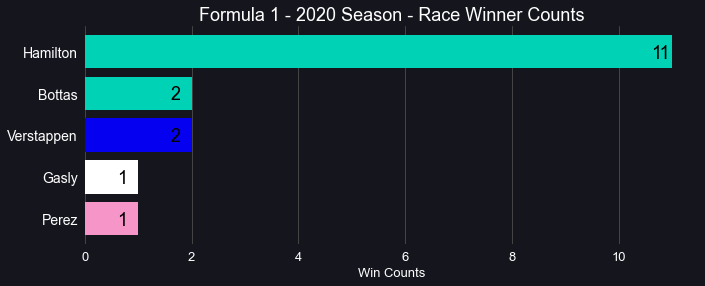

In [17]:
winnerCnt = winners['Driver'].value_counts()
plt.style.use('seaborn')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151e'
plt.rcParams['figure.facecolor'] = '#15151e'
plt.rcParams['grid.color'] = '#444444'
c = assign_color('drivers',winnerCnt.index)
plt.figure(figsize=(11,4))
plt.barh([driver.split()[1] for driver in winnerCnt.index], winnerCnt.values, color=c)
for i in range(len(winnerCnt.values)):
    plt.text(winnerCnt.values[i]-0.4, i+0.15, winnerCnt.values[i], color='k', fontsize=18)
plt.axis([0,max(winnerCnt.values)+0.5,len(winnerCnt)-0.4,-0.6])
plt.title("Formula 1 - 2020 Season - Race Winner Counts", fontsize=18)
plt.xlabel("Win Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.show()

All in all, there are 5 different race winners this season; where **Hamilton** as driver and **Mercedes** as team dominated in terms of win counts. Plus, as discussed above, **Gasly** and **Perez** took their first wins in their F1 careers.

Additionally, if you ever wonder **how many hours we spent at least** watching these F1 races on TV (or any other media) this season, look at the result below: _(Yes, it's more than 24 hours!)_

In [18]:
totalTime = timedelta()
for time in winners['Total Time']:
    totalTime += timedelta(hours=int(time[0]), minutes=int(time[2:4]), seconds=int(time[5:7]), milliseconds=int(time[8:]))
print("TOTAL WINNERS RACE TIME: {} day {} hours {} minutes {} seconds".format(totalTime.days, totalTime.seconds//3600, 
                                                (totalTime.seconds-(totalTime.seconds//3600*3600))//60,
                                                (totalTime.seconds-(totalTime.seconds//3600*3600))%60 ) )

TOTAL WINNERS RACE TIME: 1 day 4 hours 18 minutes 27 seconds


### Pole Positions

As we talked about the race winners, the **pole positions** should not go unnoticed! Let's reveal which drivers deserved to start in the first place in grands prix individually:

In [19]:
polePos = raceResults[raceResults['Starting Grid'] == 1][['Track','Driver','Team','Position','Fastest Lap']].set_index('Track')
polePos.rename(columns={'Position':'Finish Position'}, inplace=True)
polePos

,Driver,Team,Finish Position,Fastest Lap
Track,,,,
Austria,Valtteri Bottas,Mercedes,1,No
Styria,Lewis Hamilton,Mercedes,1,No
Hungary,Lewis Hamilton,Mercedes,1,Yes
Great Britain,Lewis Hamilton,Mercedes,1,No
70th Anniversary,Valtteri Bottas,Mercedes,3,No
Spain,Lewis Hamilton,Mercedes,1,No
Belgium,Lewis Hamilton,Mercedes,1,No
Italy,Lewis Hamilton,Mercedes,7,Yes
Tuscany,Lewis Hamilton,Mercedes,1,Yes


Whoa! We encounter **Mercedes** drivers' superiorities again, even in pole position analysis! In **15** out of 17 tracks, we saw those cars starting 1st in the grid. Of course, **Lewis Hamilton**'s name appeared the most, **10 times**.

The other drivers that are not from Mercedes team are **Lance Stroll** and **Max Verstappen**, getting the pole position only once. _(But remember, Stroll snatched his for the first time, in Turkey!)_

More importantly, **Verstappen** prevented the Mercedes-powered cars from scoring 100% pole positions this season; surprisingly, he did this in the very **last race**! _(with Honda engine, of course)_

_As a side note, no drivers in pole position were given any penalties after qualifying sessions, thus I can assure you that the outcome above is 100% accurate._

### Podium Finishes

Winning a race and getting on the top of the podium is **perfect and priceless** feeling for any F1 driver. However, a podium consists of **three drivers**, hence finishing **2nd or 3rd** should also be great accomplishments.

Here, let's examine the drivers by counting their podiums among all races of 2020:

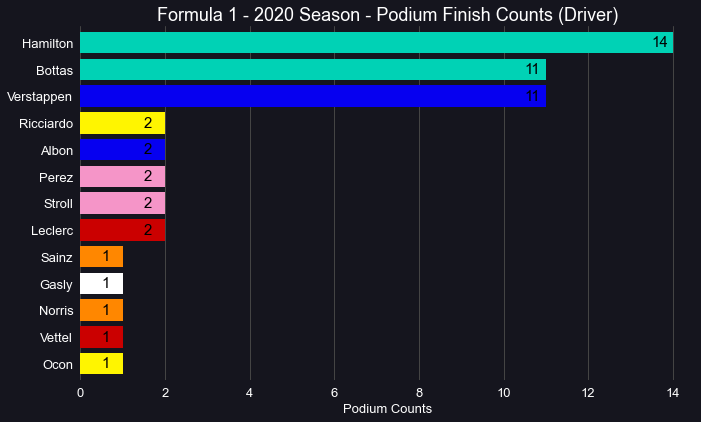

In [20]:
podiums = raceResults[raceResults['Position'].isin(['1','2','3'])]
podiumsCnt = podiums['Driver'].value_counts()
c = assign_color('drivers',podiumsCnt.index)
plt.figure(figsize=(11,6.5))
plt.barh([driver.split()[1] for driver in podiumsCnt.index], podiumsCnt.values, color=c)
for i in range(len(podiumsCnt.values)):
    plt.text(podiumsCnt.values[i]-0.5, i+0.15, podiumsCnt.values[i], color='k', fontsize=15)
plt.axis([0,max(podiumsCnt)+0.5,len(podiumsCnt)-0.4,-0.6])
plt.title("Formula 1 - 2020 Season - Podium Finish Counts (Driver)", fontsize=18)
plt.xlabel("Podium Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

Ah! We, again, see **Hamilton**'s name on the top, with **14**! The second most podiums were acquired from not one, but two drivers: **Verstappen** and **Bottas**.

And the rest who achieved to finish in the top 3, have joined the ceremony **once** or **twice**. The drivers with two are **Leclerc**, **Stroll**, **Albon**, **Perez**, and **Ricciardo**; while those with one are **Sainz**, **Vettel**, **Norris**, **Gasly** and **Ocon**.

I have to remind you that **Albon (2)**, **Norris**, **Gasly** and **Ocon** have received their podium trophies for the first time this season!

Consequently, as seen above, there were **13** different drivers stepped on the podiums this season; one of the **highest diversity** within the last several years!

Furthermore, if we merge all the counts for **all the teams** accordingly, then we get this visualization below:

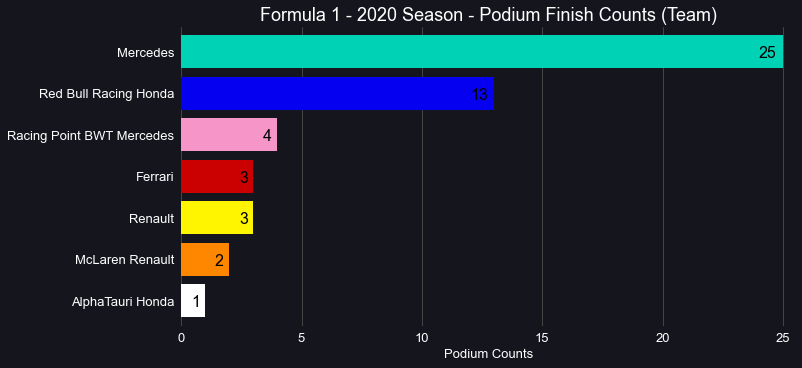

In [21]:
podiumsCntTeam = podiums['Team'].value_counts()
c = assign_color('teams',podiumsCntTeam.index)
plt.figure(figsize=(11,5.5))
plt.barh(podiumsCntTeam.index, podiumsCntTeam.values, color=c)
for i in range(len(podiumsCntTeam.values)):
    if podiumsCntTeam.values[i] >= 10:  sh = 1
    else:   sh = 0.6
    plt.text(podiumsCntTeam.values[i]-sh, i+0.15, podiumsCntTeam.values[i], color='k', fontsize=16)
plt.axis([0,max(podiumsCntTeam.values)+0.5,len(podiumsCntTeam)-0.4,-0.6])
plt.title("Formula 1 - 2020 Season - Podium Finish Counts (Team)", fontsize=18)
plt.xlabel("Podium Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

Say no more, **Mercedes** had the most podiums this season, which is **25** and almost double the amount of **Red Bull Racing**! Plus, we have come across drivers on podiums from **7 different** teams.

**Renault** should feel good for having several podiums; a total of **5**, both from the factory team and their customer **McLaren**.

It's kind of disappointing that **Scuderia Ferrari** completed the season with only **3** podiums, which might be the least in the last decade if I'm not wrong.

### Top 10 Finishes

If you think counting only the wins and podiums are not enough, then let's get it even broader; this time by **counting the top 10 finishes** for all drivers!

_So, this will answer the question:_ How many times a driver, who competed in 2020 Season, achieved to obtain championship points?

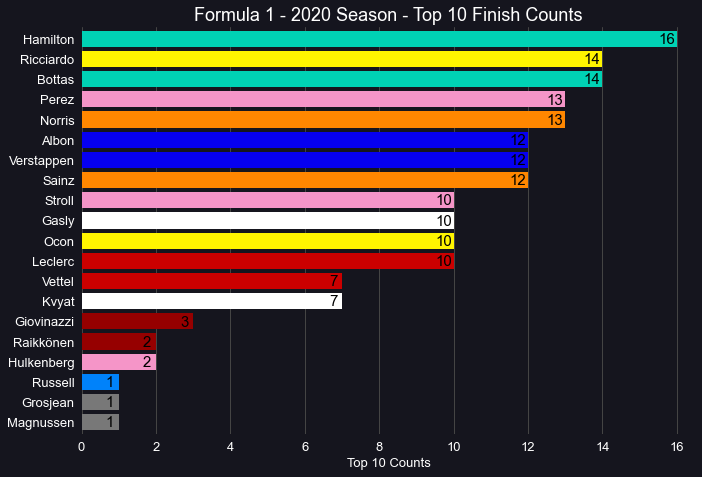

In [22]:
top10 = map(str, list(range(1,11)))
topTenFinishes = raceResults[raceResults['Position'].isin(top10)]['Driver'].value_counts()
c = assign_color('drivers',topTenFinishes.index)
plt.figure(figsize=(11,7.5))
plt.barh([driver.split()[1] for driver in topTenFinishes.index], topTenFinishes.values, color=c)
for i in range(len(topTenFinishes.values)):
    if topTenFinishes.values[i] >= 10:  sh = 0.5
    else:   sh = 0.35
    plt.text(topTenFinishes.values[i]-sh, i+0.23, topTenFinishes.values[i], color='k', fontsize=15)
plt.axis([0,max(topTenFinishes.values)+0.5,len(topTenFinishes)-0.4,-0.6])
plt.title("Formula 1 - 2020 Season - Top 10 Finish Counts", fontsize=18)
plt.xlabel("Top 10 Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

Yes, as expected, it got even broader! From this chart, total of **20** drivers took place in the Drivers Standings with points. Again, **Lewis Hamilton** is in the 1st place (with 16); not surprising even in this category. This could've been 17 out of 17 if he did not miss the Sakhir GP!

The second most successful driver, shared with **Bottas**, is **Daniel Ricciardo** from Renault! Getting points in 14 different races looks like a pretty good performance for Honey Badger, right?

Other than that, McLaren guys **Norris** and **Sainz** made it to the top ten, 12 and 13 times; Red Bull drivers **Verstappen** and **Albon** tied with 12; **Perez** and **Stroll** of Racing Point reached this range 13 and 10 times, respectively. About **Ferrari**, they look underperformed from this view, as **Leclerc** and **Vettel** were behind the aforementioned drivers and scored points a total of **17** times.

Speaking of Sakhir GP again, this is **George Russell's only race** that he scored points (while in Mercedes, of course).

More interestingly, **Nico Hulkenberg** has made it to the top 10 in **two out of three races** he got a seat in Racing Point. However, his **infamous** record _Most Grand Prix starts without a podium_ still continues. Excruciating!..

### Fastest Lap Counts

Every race, a driver is selected for setting the fastest lap time. Since 2019, the advantage is that **one additional point** is awarded to the driver who became the quickest within a lap. Although it is not much in terms of points, **any small changes** like that could affect the standings substantially!

Well, which drivers achieved setting the fastest laps in all tracks of this season?

In [23]:
fastestLaps = raceResults[raceResults['Fastest Lap'] == 'Yes']
fastestLaps.set_index('Track')[['No', 'Driver', 'Team', 'Position']].rename(columns={'Position':'Finish Position'})

,No,Driver,Team,Finish Position
Track,,,,
Austria,4,Lando Norris,McLaren Renault,3
Styria,55,Carlos Sainz,McLaren Renault,9
Hungary,44,Lewis Hamilton,Mercedes,1
Great Britain,33,Max Verstappen,Red Bull Racing Honda,2
70th Anniversary,44,Lewis Hamilton,Mercedes,2
Spain,77,Valtteri Bottas,Mercedes,3
Belgium,3,Daniel Ricciardo,Renault,4
Italy,44,Lewis Hamilton,Mercedes,7
Tuscany,44,Lewis Hamilton,Mercedes,1


As the table represents, mostly **Mercedes** drivers showed their rivals who were the fastest! Plus, we can see **Hamilton**'s name several times.

However, the common thing for the drivers above is they all finished in the **top 10**! The rulebook of Formula 1 indicates that any driver must finish within **the first 10 places** in order to claim the additional point. Nevertheless, all the names here deserved these by staying in the required position range.

In the meantime, a visualization like below could help us to count the number of times drivers set the fastest laps altogether...

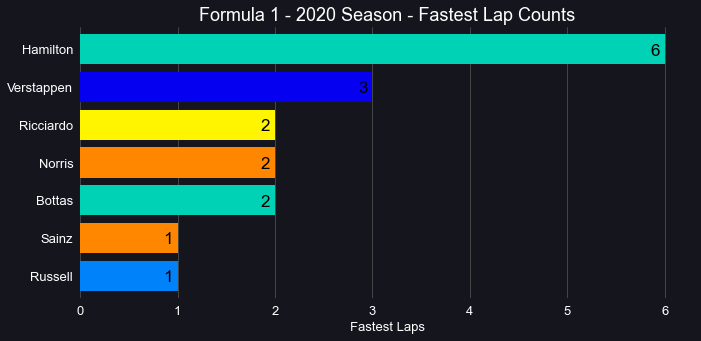

In [24]:
fastestLapCnt = fastestLaps['Driver'].value_counts()
c = assign_color('drivers',fastestLapCnt.index)
plt.figure(figsize=(11,5))
plt.barh([driver.split()[1] for driver in fastestLapCnt.index], fastestLapCnt.values, color=c)
for i in range(len(fastestLapCnt.values)):
    plt.text(fastestLapCnt.values[i]-0.15, i+0.15, fastestLapCnt.values[i], color='k', fontsize=17)
plt.axis([0,max(fastestLapCnt.values)+0.3,len(fastestLapCnt)-0.4,-0.6])
plt.title("Formula 1 - 2020 Season - Fastest Lap Counts", fontsize=18)
plt.xlabel("Fastest Laps", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

Here, **Hamilton** is on the top once more, a total of **6** times! That is, six additional points for him! As a team, **Mercedes** with **eight**! Then, **Verstappen** achieved this in **3** different races.

_There is one additional thing to explain; although George Russell is officially Williams driver, he made it to the list by setting the fastest lap in **Mercedes** car in **Sakhir GP**, but the color of the team where he normally belonged to remain unchanged._

### DNF Analyses

After several analyses, now let's move on to another aspect: **DNF**, the abbreviation of Did Not Finish. To be honest, this is not a good thing for both drivers and teams as **making a small mistake** or **mechanical issues** on the fly could end up with retirements from races and sometimes the great opportunities could be lost! However, this is Formula 1, a motorsport discipline, thus those incidents are sometimes inevitable in such moments!

Initially, let's get the **total number of DNFs** occurred this season:

In [25]:
DNF = raceResults[raceResults['Total Time/Gap/Retirement'] == 'DNF']
print("Total of {} DNFs have occurred.".format(DNF.shape[0]))

Total of 55 DNFs have occurred.


55 DNFs? Well, not more not less. But, in order to understand better for how the number has been reached, we've got to make it detailed by taking **some factors** into account.

In the first step, let's break it down by considering the **Grands Prix individually**:

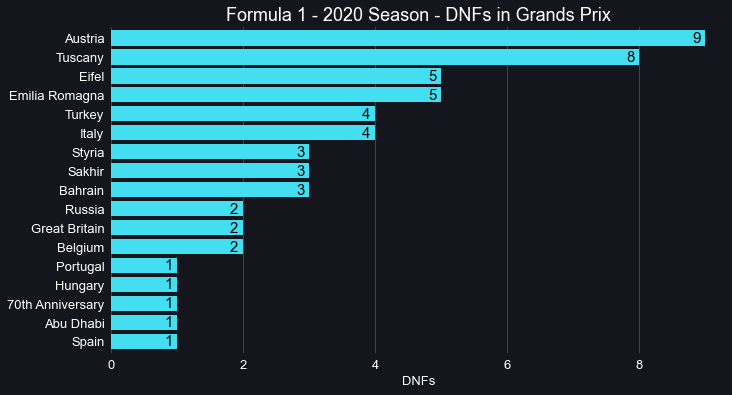

In [26]:
DNFtrack = DNF['Track'].value_counts()
plt.figure(figsize=(11,6))
plt.barh(DNFtrack.index, DNFtrack.values, color='#43def0')
for i in range(len(DNFtrack.values)):
    plt.text(DNFtrack.values[i]-0.2, i+0.23, DNFtrack.values[i], color='k', fontsize=15)
plt.axis([0,max(DNFtrack.values)+0.3,len(DNFtrack)-0.4,-0.6])
plt.title("Formula 1 - 2020 Season - DNFs in Grands Prix", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

Oh, this looks interesting... The season opener **Austria GP** had the most DNFs than any other! Almost the half of the drivers retired from that race! Then, **Tuscany GP** came after with **eight** drivers being out!

On the other side, there are **five** different Grands Prix which ended up with just **single** retirement: **Abu Dhabi**, **Hungary**, **70th Anniversary**, **Spain** and **Portugal**.

Meanwhile, if you are curious that which drivers were not able to finish in Austria GP, take a look at the outcome below:

In [27]:
raceResults[(raceResults['Track'] == 'Austria') & (raceResults['Total Time/Gap/Retirement'] == 'DNF')] \
    [['Driver', 'Team', 'Laps']]

,Driver,Team,Laps
11,Daniil Kvyat,AlphaTauri Honda,69
12,Alexander Albon,Red Bull Racing Honda,67
13,Kimi Raikkönen,Alfa Romeo Racing Ferrari,53
14,George Russell,Williams Mercedes,49
15,Romain Grosjean,Haas Ferrari,49
16,Kevin Magnussen,Haas Ferrari,24
17,Lance Stroll,Racing Point BWT Mercedes,20
18,Daniel Ricciardo,Renault,17
19,Max Verstappen,Red Bull Racing Honda,11


In the second step, I'd like to get the DNF counts according to **drivers**:

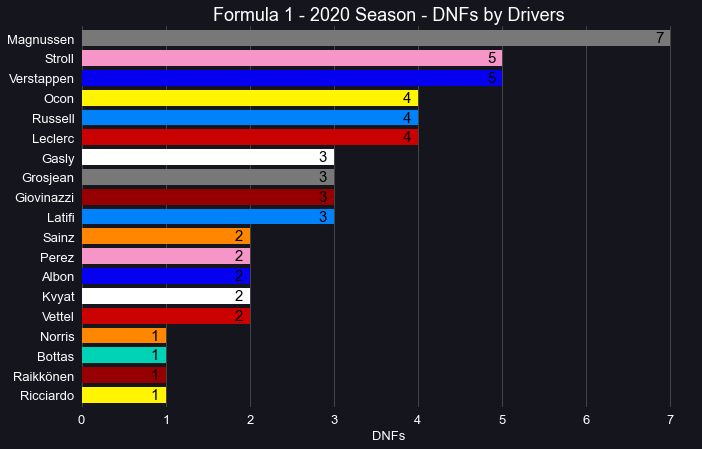

In [28]:
DNFdriver = DNF['Driver'].value_counts()
c = assign_color('drivers',DNFdriver.index)
plt.figure(figsize=(11,7))
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver.values, color=c)
for i in range(len(DNFdriver.values)):
    plt.text(DNFdriver.values[i]-0.18, i+0.21, DNFdriver.values[i], color='k', fontsize=15)
plt.axis([0,max(DNFdriver.values)+0.3,len(DNFdriver)-0.4,-0.6])
plt.title("Formula 1 - 2020 Season - DNFs by Drivers", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

Hmmm, it's **Kevin Magnussen** who suffered the most retirements (7) this season! In other words, the Danish driver was able to see the chequered flag in 10 different races.

**Stroll** and **Verstappen** shared the 2nd place with **5** DNFs. Then, **Ocon**, **Leclerc** and **Russell** came after, with **4**.

Luckily **Raikkönen**, **Norris**, **Ricciardo** and **Bottas** got over with just **one** DNF throughout the season. Plus, if you inspect the previous outcome, you'll notice that **Ricciardo's retirement** came only from the Austria GP!

More importantly, I'm sure you did not see one driver's name in the above visualization! Yep, **Lewis Hamilton** never became DNF that could be another evidence for his masterful driving _(no, we don't count his absence in Sakhir GP)._

When we consider these DNFs by **teams**, then we encounter this:

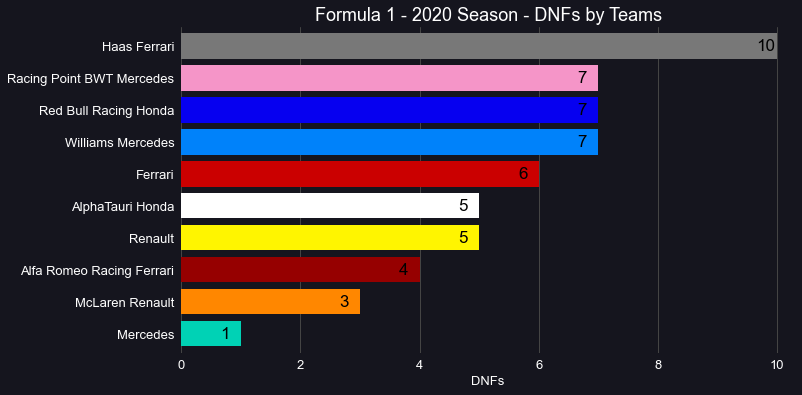

In [29]:
DNFteam = DNF['Team'].value_counts()
c = assign_color('teams',DNFteam.index)
plt.figure(figsize=(11,6))
plt.barh(DNFteam.index, DNFteam.values, color=c)
for i in range(len(DNFteam.values)):
    plt.text(DNFteam.values[i]-0.35, i+0.15, DNFteam.values[i], color='k', fontsize=17)
plt.axis([0,max(DNFteam.values)+0.3,len(DNFteam)-0.4,-0.6])
plt.title("Formula 1 - 2020 Season - DNFs by Teams", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

Ah, this implies that all teams, more or less, have experienced DNFs this season! 

Unfortunately, **Haas** had the most among all others, with **10**. In contrast, **Mercedes** team had the least (only 1) without a doubt; should be a proof of very high durability of their cars.

Certainly, **Bottas** suffered just one retirement in 2020. But, in which Grand Prix?

In [30]:
raceResults[(raceResults['Team'] == 'Mercedes') & (raceResults['Total Time/Gap/Retirement'] == 'DNF')] \
    [['Track', 'Driver', 'Team', 'Starting Grid']]

,Track,Driver,Team,Starting Grid
218,Eifel,Valtteri Bottas,Mercedes,1


Oh, the **Eifel GP** where he started on **pole position**, but a mechanical issue forced him to retire to the garage! That looks disappointing...

In the third step, let's discuss **the special cases**: We said that DNFs are not good things for drivers and teams, but even worse, it's **DNS** (Did Not Start)! That is, such a driver nevet got into the grid at the beginning of the race, due to **serious issues** on the cars that could not be fixed on time!

Is there anyone who failed to get into the starting grid this season? Let's look at the outcome below:

In [31]:
raceResults[raceResults['Total Time/Gap/Retirement'] == 'DNS'].loc[:,'Track':'Team'].set_index('Track')

,Position,No,Driver,Team
Track,,,,
Great Britain,NC,27,Nico Hulkenberg,Racing Point BWT Mercedes
Belgium,NC,55,Carlos Sainz,McLaren Renault


_Two drivers:_ **Nico Hulkenberg** who was called to race for Racing Point in Great Britain GP but he was so unlucky for not being able to race there! The other one is **Carlos Sainz** who lived the same fate in Belgium GP.

In addition, let's not forget the **another special case**: There might be some drivers who were out of the races but accomplished to **drive more than 90% of race distance**, thus earning the right to **get into the classification** in race results.

Here, are we going to see any drivers who had this such case explained above?

In [32]:
raceResults[(raceResults['Position'] != 'NC') & (raceResults['Total Time/Gap/Retirement'] == 'DNF')] \
        .loc[:,'Track':'Laps'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps
Track,,,,,,
Austria,12,26,Daniil Kvyat,AlphaTauri Honda,13,69
Austria,13,23,Alexander Albon,Red Bull Racing Honda,4,67
Turkey,17,20,Kevin Magnussen,Haas Ferrari,13,55
Bahrain,18,11,Sergio Perez,Racing Point BWT Mercedes,5,53


_Total of 4 drivers in 3 different GPs._ Still, it may not be a good feeling, as definitely there are no points awarded consequently and not seeing the car crossing the finish line properly...

### Drivers in Top 10 - Points Progression in 2020 Season

In the above analyses, we have seen the _final Drivers Standings_ of this season. But, have you ever wondered how the drivers that placed in the top 10 **progressed throughout the season**?

Now is the time to reveal it with a fancy **plot chart**! All we have to do is to **grab the points** earned for drivers involved in each Grand Prix individually; **sum the points** cumulatively and **reflect the progress** in the visualization below!

_Any driver that placed lower than his teammate in the same team (according to final Drivers Standings) have been shown with a different linestyle to avoid confusions._

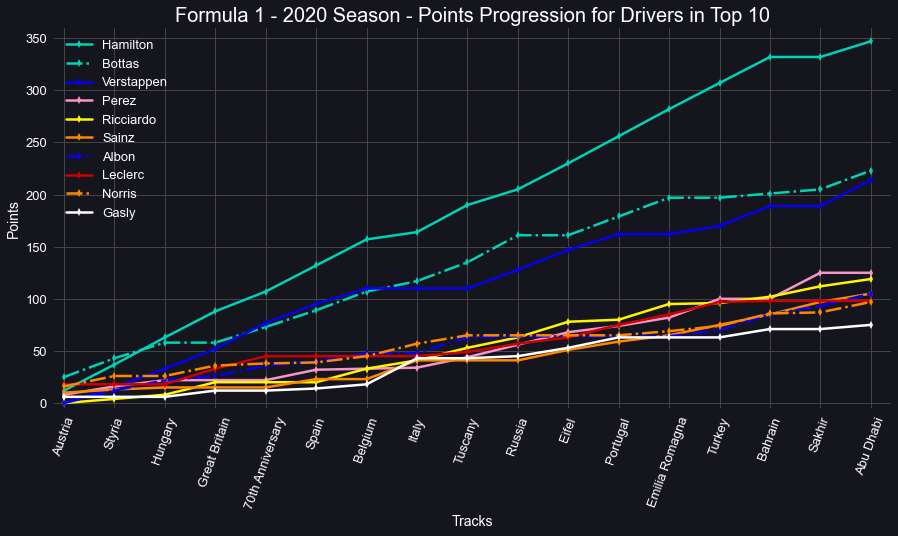

In [33]:
GPnames = raceResults['Track'].unique()
TopTenDrivers = driversSt.head(10)['Driver'].values
color = assign_color('drivers',TopTenDrivers)
abbr = [driver.split()[1] for driver in TopTenDrivers]
plt.figure(figsize=(15,7))
for i in range(len(TopTenDrivers)):
    ptsPrg = raceResults[raceResults['Driver'] == TopTenDrivers[i]]['Points'].cumsum().values
    for j in range(len(GPnames)):
        if TopTenDrivers[i] not in raceResults[raceResults['Track'] == GPnames[j]]['Driver'].values:
            ptsPrg = np.insert(ptsPrg, j-1, ptsPrg[j-1])
    if abbr[i].upper()[0:3] in ['BOT','ALB','NOR']:
        plt.plot(ptsPrg, color=color[i], label=abbr[i], marker='d', markersize=5, linestyle='-.', linewidth=2.5)
    else:  plt.plot(ptsPrg, color=color[i], label=abbr[i], marker='d', markersize=5, linewidth=2.5)
plt.axis([-0.2,16.4,-5,360])
plt.title("Formula 1 - 2020 Season - Points Progression for Drivers in Top 10", fontsize=20)
plt.xlabel("Tracks", fontsize=14)
plt.xticks(range(17), GPnames, rotation=70, fontsize=13)
plt.ylabel("Points", fontsize=14)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.show()

From this chart, we can definitely say for **Lewis Hamilton**, starting from the third race, he never got the leadership carried away to anyone else! With his superior performance this season, he became the world champion seventh time with **3 races left**! In other words, he guaranteed the title in **Turkish GP**.

It seems there was a noticeable competition between **Bottas** and **Verstappen** for the **2nd place** where the points gap is not much overall. But, it's Bottas who took a smile on his face by finishing ahead of Verstappen at the end! Anyway, none of them could match Hamilton as the points gap was usually getting enlarged after each Grand Prix.

Leaving these three drivers aside, a much bigger rivalry occured with several drivers to get to the **4th place**! In the first half of the season, **Leclerc** and **Norris** stayed in that position most of the time. Later, **Ricciardo** took the step up (well, thanks to his podium finishes twice), but at the end, **Perez** achieved to earn that position with his win at Sakhir GP helped him significantly.

### Teams - Points Progression in 2020 Season

Okay, let's turn our attention to **all teams** participated this season; perform the exact points progression analysis and observe how the placements in the Constructors Standings changed after each Grand Prix.

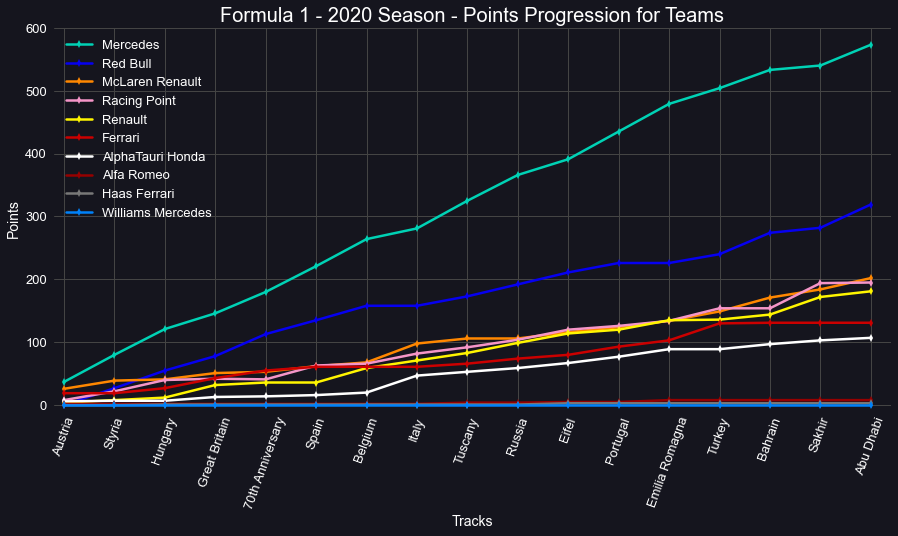

In [34]:
trackTeamPts = raceResults.groupby(['Track','Team'])['Points'].agg('sum')
trackTeamPts.loc[('70th Anniversary','Racing Point BWT Mercedes')] -= 15
trackOrder = raceResults['Track'].unique()
teamOrder = constructorsSt['Team'].unique()
color = assign_color('teams',teamOrder)
abbr = [" ".join(team.split()[0:2]) for team in teamOrder]
plt.figure(figsize=(15,7))
for i in range(len(teamOrder)):
    teamPts = []
    for j in range(len(trackOrder)):
        teamPts.append(trackTeamPts.loc[(trackOrder[j],teamOrder[i])])
    teamPts = np.array(teamPts).cumsum()
    plt.plot(teamPts, color=color[i], label=abbr[i], marker='d', markersize=5, linewidth=2.5)
plt.title("Formula 1 - 2020 Season - Points Progression for Teams", fontsize=20)
plt.axis([-0.2,16.4,-5,600])
plt.xlabel('Tracks', fontsize=14)
plt.xticks(range(17), trackOrder, rotation=70, fontsize=13)
plt.ylabel('Points', fontsize=14)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.show()

There is no doubt to say that **Mercedes** team dominated the 2020 Season since the first race! Plus, the gap between them and **Red Bull Racing** have generally been extended after each race. Besides, they have guaranteed to take the Constructors' championship title by **4 races remaining**!

Speaking of **Red Bull**, thanks to the major contribution from **Verstappen**, they have stayed in the 2nd place (except for the first two races).

But, the real competition happened for the **3rd place**! We can tell there are lots of changes in the standings between **Racing Point**, **McLaren**, and **Renault**. (**Ferrari** could have been added, but they seem to be dropped out in the second half of the season). In the end, the papaya orange **McLaren** has claimed to become the 3rd best team, which is a great result for them, thinking about their last 5-6 years!

_As a side note, Racing Point has their points been deducted by 15 points in August, which was applied at 70th Anniversary GP in the above visualization. Hence, they could've taken the 3rd place if this deduction wasn't carried out!_

In case you wondered, how many times and which races _Mercedes_ team has accomplished to **gain the maximum points** (i.e. 25 points for 1st place finish, 18 points for 2nd place finish and +1 point for fastest lap), just read the statement below!

In [35]:
print("Mercedes has accomplished to earn the maximum points in {} different Grands Prix!"
      .format((trackTeamPts.loc[(slice(None),'Mercedes')] == 44).sum()))
print("These GPs are: {}".format( \
    trackTeamPts.loc[(slice(None),'Mercedes')].reset_index().query('Points == 44')['Track'].tolist()))

Mercedes has accomplished to earn the maximum points in 3 different Grands Prix!
These GPs are: ['Emilia Romagna', 'Portugal', 'Tuscany']


### Drivers in Top 10 - Race Finish Positions in 2020 Season

All right, we'd seen the points progression of the drivers finished in top 10 of Drivers Standings above. In order to support the situation, however, it could be nice to add a different perspective. So, how about **the finish positions of each race** for top ten drivers this season?

Yep, you may find it _too complex_ at first when examined, but just focus on _the same line_ for each driver to clearly see the finish places. There are two additional notes I have to explain:

* _Any involved driver who was DNF in any race was considered to finish in the 20th place._
* _For **Hamilton** and **Perez**, their absence in the corresponding Grands Prix have been greyed out due to being tested positive for Covid-19 in those race weekends._

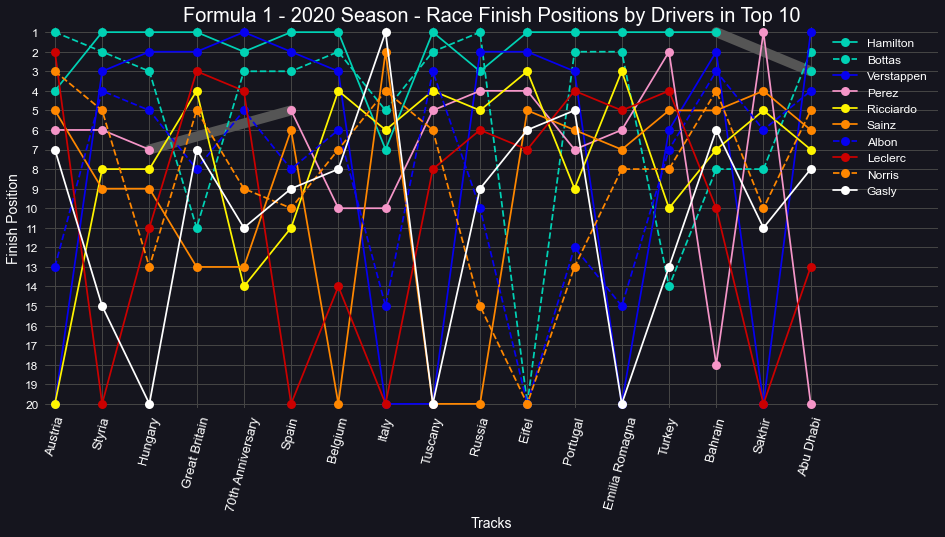

In [36]:
finishPos = raceResults[['Track','Driver','Position']].copy()
finishPos['Position'].replace('NC','20',inplace=True)
finishPos['Position'] = finishPos['Position'].astype(float)
driverOrder = driversSt['Driver'].unique()[:10]
color = assign_color('drivers',driverOrder)
plt.figure(figsize=(16,7))
plt.axis([-0.2,18.7,20.2,0.75])
plt.plot([2,5], [7,5], color='#555555', linewidth=10)
plt.plot([14,16], [1,3], color='#555555', linewidth=10)
for i in range(len(driverOrder)):
    driverPos = finishPos[finishPos['Driver'] == driverOrder[i]]['Position'].values
    abbr = driverOrder[i].split()[1].upper()[0:3]
    if abbr == 'HAM':   driverPos = np.insert(driverPos, 15, np.nan)
    if abbr == 'PER':   driverPos = np.insert(driverPos, 3, [np.nan,np.nan])
    if abbr in ['BOT','ALB','NOR']: ls = '--'
    else:   ls = '-'
    plt.plot(trackOrder, driverPos, color=color[i], marker='o', markersize=9, linestyle=ls, label=driverOrder[i].split()[1])
plt.title("Formula 1 - 2020 Season - Race Finish Positions by Drivers in Top 10", fontsize=20)
plt.xlabel('Tracks', fontsize=14)
plt.xticks(rotation=75, fontsize=13)
plt.ylabel('Finish Position', fontsize=14)
plt.yticks(range(1,21),range(1,21), fontsize=12)
plt.legend(fontsize=12)
plt.show()

This advanced plot chart definitely **proves the outcomes** we've extracted in above analyses. Moreover, from this point of view, we are able to count the drivers' _wins_ (i.e. just examine the line that indicates finish position of 1), _podiums_ (i.e. the first three lines altogether), the top 10 finishes, even the DNFs and any other questions in mind that we can find the answer quickly.

Well, as you can see easily, **Hamilton** achieved a 5-win streak this season, from **Eifel** to **Bahrain GP**.

### Laps and Distances Driven by Drivers

Now, let's turn our attention to one more aspect that could be somewhat interesting: **The total laps driven by drivers.** Here, only the _full laps_ driven in **race sessions** are taken into account. In other words, there's nothing about the laps driven in all practice and qualifying sessions. Furthermore, formation laps and any partial distance gone for any laps in races are ignored.

Despite with these strict restrictions, it is intriguing to point out how **any driver or team's endurances** are (affected with error-free driving and durable car parts) throughout the season by looking at these numbers no matter where they finished...

_Note that the reserved drivers (Hulkenberg, Fittipaldi, Aitken) are not included in this visualization below._

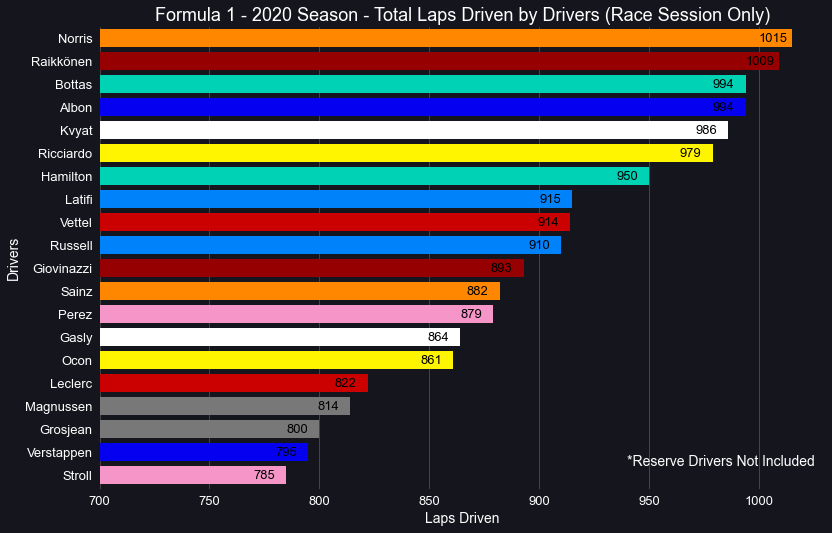

In [37]:
driverLaps = raceResults.groupby(['Driver'])['Laps'].sum().sort_values().tail(20)
c = assign_color('drivers',driverLaps.index)
abbr = [driver.split()[1] for driver in driverLaps.index]
plt.figure(figsize=(13,8.5))
plt.barh(driverLaps.index, driverLaps, color=c)
plt.axis([700,1030,-0.6,19.5])
for i in range(len(driverLaps)):
    plt.text(driverLaps[i]-15, i-0.15, driverLaps[i], fontsize=13, color='k')
plt.text(940, 0.4, "*Reserve Drivers Not Included", fontsize=14)
plt.title("Formula 1 - 2020 Season - Total Laps Driven by Drivers (Race Session Only)", fontsize=18)
plt.xlabel('Laps Driven', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Drivers', fontsize=14)
plt.yticks(range(20), abbr, fontsize=13)
plt.grid(axis='y')
plt.show()

Oh, the graph above tell us many things... Here, it is revealed that **Norris** did the most laps than anybody else! That's more than 1000! The Iceman **Raikkönen** also earned the same achievement, only 6 laps behind the leader in this measurement.

We should not forget that **Lewis Hamilton** could have taken the top step here if he was able to race in **Sakhir GP**; thus he could have taken the number up to **1037**. _(remember that the Sakhir GP was organized over 87 laps)_

On the other hand, it is sad to see **Lance Stroll** driving the least laps in races (less than 800); so, almost the same for **Max Verstappen** although he completed **3rd** in Drivers Standings. Similarly, we observe that **both Haas drivers** and **Leclerc**'s lap counts were not high.

Well, counting the laps for each driver may not be enough because total laps and circuit lengths in each race are **always different** (except the races organized twice). That's why, let's also get **kilometres driven for each driver** this season to grab additional insights.

For this purpose, the same restrictions as in the analyses above were applied here. That's why, it is considered as **estimated distance driven.** Will we be able to see any differences?

_Again, the reserve drivers are not included in the visualization below._

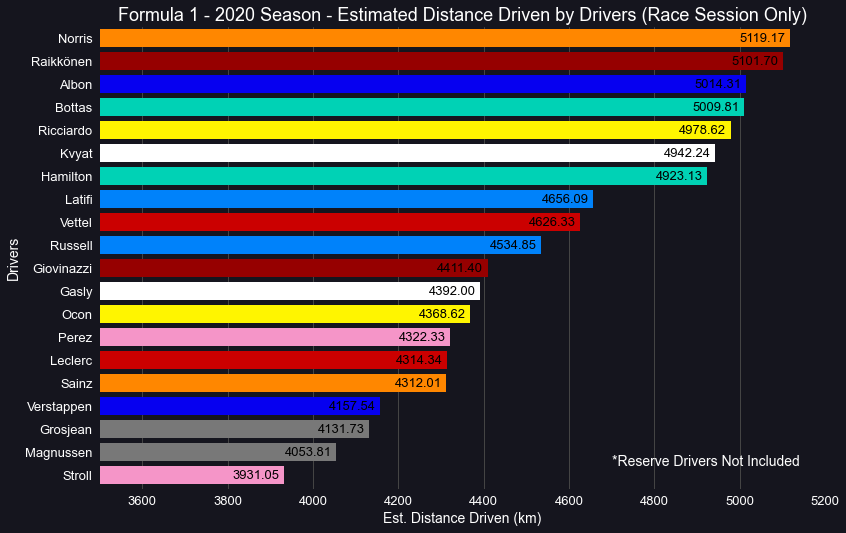

In [38]:
circuitLenOrder = calendar['Circuit Length(km)'].values
driverLaps = raceResults.groupby(['Driver','Track'])['Laps'].sum().reset_index()
driverOrder = driversSt['Driver'].unique()
driverOrder = np.delete(driverOrder, [14,21,22])
driverTotDist = np.array([])
for i in range(len(driverOrder)):
    dlaps = np.array([])
    for j in range(len(trackOrder)):
        dl = driverLaps.loc[(driverLaps['Driver'] == driverOrder[i]) & 
                            (driverLaps['Track'] == trackOrder[j])]['Laps'].tolist()
        if len(dl) == 0:  dlaps = np.append(dlaps, 0)
        else:  dlaps = np.append(dlaps, dl[0])
    driverTotDist = np.append(driverTotDist, sum(dlaps * circuitLenOrder))
driverTotDist = pd.Series(driverTotDist, index=driverOrder).sort_values()
c = assign_color('drivers',driverTotDist.index)
plt.figure(figsize=(13,8.5))
plt.axis([3500,5200,-0.6,19.5])
plt.barh([driver.split()[1] for driver in driverTotDist.index], driverTotDist, color=c)
for i in range(len(driverTotDist)):
    plt.text(driverTotDist[i]-120, i-0.15, "{:6.2f}".format(driverTotDist[i]), color='k', fontsize=13)
plt.text(4700, 0.4, "*Reserve Drivers Not Included", fontsize=14)
plt.title("Formula 1 - 2020 Season - Estimated Distance Driven by Drivers (Race Session Only)", fontsize=18)
plt.xlabel('Est. Distance Driven (km)', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Drivers', fontsize=14)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

Ah, **Norris** again took the top step! Throughout the season, thanks to his driving and the durability provided by McLaren, he drove **5119 km**! And again, **Raikkönen** became the runner-up in this measurement, driving approximately 18 km less. **Albon** and **Bottas** are the other drivers who achieved going **more than 5000 km**!

Similarly above, **Hamilton** could be in the first place here if he did not miss the Sakhir GP. Knowing that any F1 race are organized to have distance of **at least 305 km**, he could bring the number up to around **5220 km**.

And again, it is disappointing to see **Stroll** going the least distance; the only driver with **less than 4000 km**. As with the total laps, we can see **Verstappen**, **Grosjean**, and **Magnussen** sharing the bottom rows. But, **Leclerc** this time had a distance between Perez and Sainz.

### Conclusion & Expectations for Next Season

**All right, everyone! We are coming to the end of data analyses of 2020 Season of Formula 1. I hope you've gained lots of insights that are interesting and remarkable; those outcomes and visualizations clearly showed us how the season has been concluded.** 

However, there are several questions that came to our mind to discuss and make predictions in advance, for 2021 Season:

* It's been confirmed that **Lewis Hamilton** and **Mercedes** will be together for one more year; that's **the 9th consecutive season** in the same team. The crucial question is whether or not the Briton take the championship title total of **8th time** to surpass the legendary **Michael Schumacher** and become the greatest of all time in F1 history!
* About **Red Bull Racing Honda**, can the team and **Max Verstappen** challenge harder against Mercedes and their drivers? Now with the Mexican **Sergio Perez** as new teammate and promising performance in the last few races, more competitive races at the front awaits...
* We've seen in the analyses above that **Scuderia Ferrari** had one of the worst seasons in their history. With **Charles Leclerc** and new teammate **Carlos Sainz**, the fans expect that they need to turn the tides to get back the racing performance where they deserved to be.
* For **McLaren**, they switched to **Mercedes** engine for racing like in the previous eras, such as between **late 90s and early 2000s**. Because of that switch, certainly, they're required build up a new car from scratch. They should keep up with the strong position as they finished high in 2020 Season. Plus, we can't wait for the humors created by **Daniel Ricciardo** and **Lando Norris** together!
* The two-time world champion **Fernando Alonso** is coming back to F1, with **Alpine** (yes, that's the re-branded name of **Renault** and the team where he clinched the championship titles from). Despite getting old, he's still pursuing success and want to be competitive and we'll observe how his performance will roll out. Moreover, can his teammate **Esteban Ocon** find the opportunities to force him as much as possible?
* For **Haas Ferrari**, both **Romain Grosjean** and **Kevin Magnussen** left the team at the end of 2020 Season. That means the American team will continue with new drivers, chosen from Formula 2: **Nikita Mazepin** and **Mick Schumacher**. Yep, it is great to see Schumacher name again in F1 and we wonder how well he will do in his rookie season.
* We know that **Sebastian Vettel** has parted from Ferrari as he had a tough 2020 Season with them. Now, the multi-time world champion German driver will continue his journey with **Aston Martin** (the new name of **Racing Point**, but now with a green-ish color). We believe that he will regain his strength and gain success like in the old days.
* There will be another debutant, **Yuki Tsunoda** who will be racing for **AlphaTauri Honda**. Well, let's not underestimate the Japanese although he's the shortest in terms of height and we'll be watching his racecrafting each Grand Prix.
* **Saudi Arabia** will be the newest country to organize a F1 race. Still, we don't know how the track layout will look like but the only information is that it is going to be another street circuit.
* Last but not the least, what if the effects of **Covid-19 outbreak** continues that might cause some races to be postponed or cancelled completely; when happened, thus other race tracks might find their chances to be included in the calendar, including **Turkish GP** once more.

Well, these are the key questions to be answered, but new ones could appear throughout the next season. In the month of February, all we have to do is to wait for **car reveals** by the teams' fascinating introductions to observe what their competitors' liveries look like. Then, in the next month, **some Winter tests** being carried out in **Bahrain**. And, of course, the first race of the season in the same location afterwards.

Moreover, it should be worth watching **Formula 1 - Drive To Survive** documentary in Netflix (available on **19th March**) to re-live how 2020 season progressed for all drivers and teams, including the moments behind the scenes!

We, the fans from all over the world, are counting the days to see the F1 actions back. When the day comes, that's the statement we'd like to scream out:

## It's lights out and away we go for 2021 Season!